# **Importing Libraries :-**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
%matplotlib inline
sns.set(rc={'figure.figsize':(12, 12)}, font_scale=1.2)
from datetime import datetime

# **1. Domain Knowledge Features:-**

>It's the process of creating new useful features from current 
features based on our understanding of the problem domain 
knowledge .

>**For Example :**
   1.   We have a dataset about uber with distance for trip and trip duration and we try to get speed of trip . 
   2.  We have age and we return from its age and classify it into Children ,Adolescents, Adults, Middle age, Old .





In [ ]:
df_titanic = pd.read_csv('/content/titanic_full.csv')

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df_titanic.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
767,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,NaN,Q
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C


In [ ]:
#Create function to catogrize of age
def age_name(num):
  if num<9:
    return 'Childreen'
  elif  (num >=10)& (num<=19):
    return 'Adolescents'
  elif (num >=20)& (num<=45) :
    return 'Adults' 
  elif (num >=46)& (num<=60) :
    return 'Middle age ' 
  elif (num>60) :
    return 'Old '   


In [ ]:
#Create column to catogrize of age
df_titanic['Age Category'] = df_titanic['Age'].apply(age_name)

In [ ]:
df_titanic['Age Category']

0           Adults
1           Adults
2           Adults
3           Adults
4           Adults
          ...     
886         Adults
887    Adolescents
888           None
889         Adults
890         Adults
Name: Age Category, Length: 891, dtype: object

In [ ]:
df_titanic['Age Category'].value_counts()

Adults         447
Adolescents    102
Middle age      79
Childreen       54
Old             22
Name: Age Category, dtype: int64

In [ ]:
df_titanic['Age Category'].describe()

count        704
unique         5
top       Adults
freq         447
Name: Age Category, dtype: object

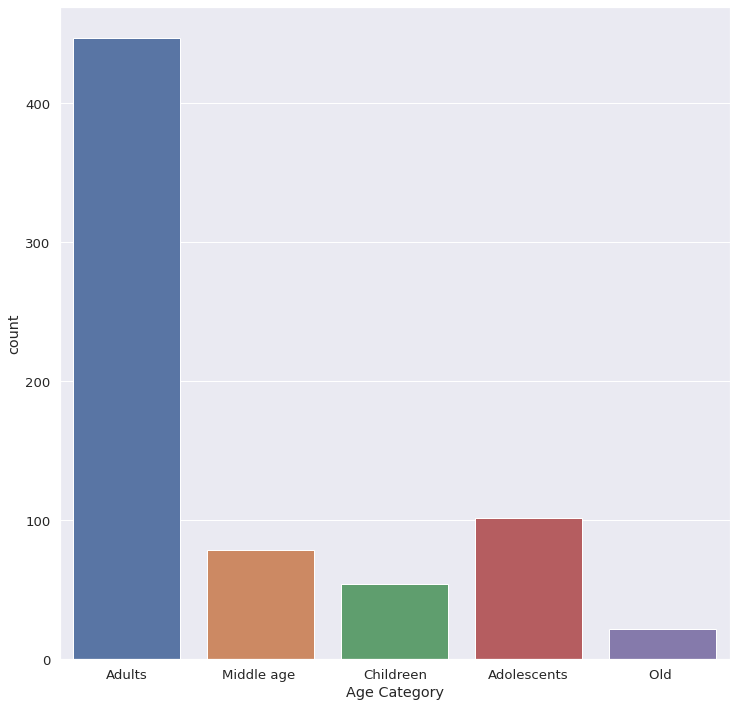

In [ ]:
sns.countplot(x=df_titanic['Age Category'])

In [ ]:
#SibSp is number of sons with passenger
#Parch is number of parents with passenger
#Create column to adding all individuals with passenger
df_titanic['With Passenger']= df_titanic['SibSp']	+ df_titanic['Parch']	

In [ ]:
df_titanic['With Passenger']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: With Passenger, Length: 891, dtype: int64

In [ ]:
df_titanic['With Passenger'].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: With Passenger, dtype: float64

In [ ]:
df_titanic['With Passenger'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: With Passenger, dtype: int64

In [ ]:
df_titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category,With Passenger
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.000,NaN,S,Adults,1
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.550,NaN,C,Adults,0
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.000,D56,S,Adults,0
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S,Adults,1
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.100,NaN,S,None,0
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.775,NaN,S,Adults,0
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.000,NaN,S,Adults,2
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.750,NaN,Q,None,0
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.000,NaN,S,None,0
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.000,D,S,Adults,0


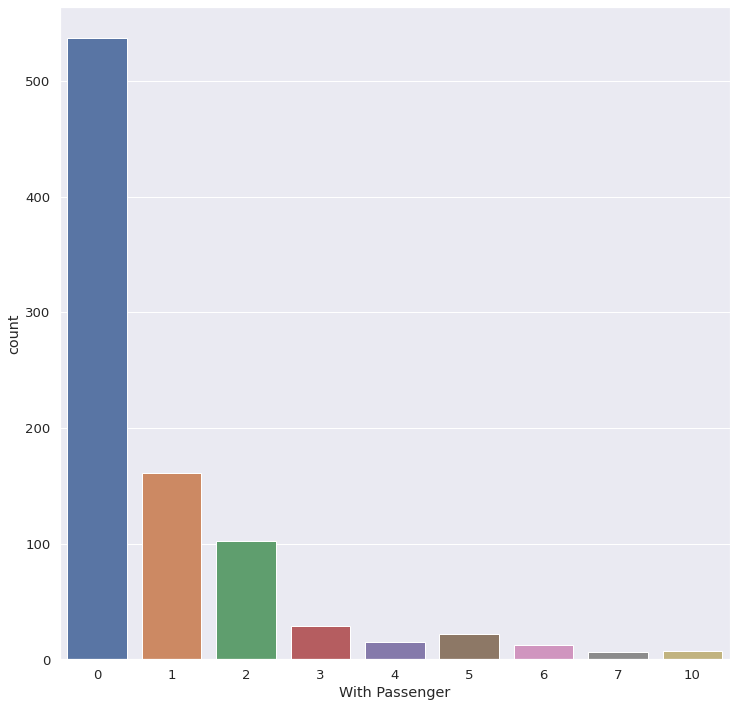

In [ ]:
sns.countplot(x='With Passenger', data=df_titanic)

In [ ]:
df_melb_data = pd.read_csv('/content/melb_data.csv')

In [ ]:
df_melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
df_melb_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [ ]:
df_melb_data.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3427,Kealba,6 McGrath Cl,3,h,545000.0,SP,Brad,16/07/2016,15.0,3021.0,3.0,2.0,2.0,570.0,163.0,1980.0,Brimbank,-37.73670,144.82460,Western Metropolitan,1202.0
834,Bentleigh East,13 Brooks St,4,t,1060000.0,S,Woodards,10/12/2016,13.9,3165.0,4.0,3.0,1.0,313.0,166.0,1960.0,Glen Eira,-37.91640,145.07650,Southern Metropolitan,10969.0
5044,Reservoir,5 Queen St,2,h,931000.0,S,Barry,4/03/2017,11.2,3073.0,2.0,1.0,1.0,487.0,NaN,NaN,Darebin,-37.72790,145.01360,Northern Metropolitan,21650.0
3590,Kew,4/76 Studley Park Rd,3,u,882000.0,S,Marshall,4/06/2016,5.6,3101.0,3.0,2.0,2.0,0.0,141.0,1950.0,Boroondara,-37.80640,145.01820,Southern Metropolitan,10331.0
9423,Bayswater,95 Orange Gr,4,h,925000.0,SP,Biggin,17/06/2017,23.2,3153.0,4.0,1.0,10.0,993.0,128.0,1966.0,Knox,-37.84688,145.25632,Eastern Metropolitan,5030.0
1855,Caulfield South,42 Poplar St,3,h,1330000.0,S,Gary,26/07/2016,9.3,3162.0,3.0,1.0,1.0,312.0,123.0,1926.0,Glen Eira,-37.88930,145.01960,Southern Metropolitan,5051.0
11834,Taylors Lakes,23A Wentworth Dr,3,t,502000.0,S,Barry,22/07/2017,15.5,3038.0,3.0,2.0,2.0,198.0,143.0,2004.0,Brimbank,-37.69503,144.77869,Western Metropolitan,5336.0
6415,Viewbank,9 Rosebud Pde,4,h,1080000.0,S,Miles,4/03/2017,13.8,3084.0,4.0,1.0,2.0,676.0,NaN,NaN,Banyule,-37.73890,145.08610,Eastern Metropolitan,2698.0
8817,Gisborne,3 Sansom St,4,h,521000.0,SP,Raine,1/07/2017,45.9,3437.0,4.0,2.0,2.0,978.0,144.0,1980.0,Macedon Ranges,-37.49642,144.60119,Northern Victoria,3376.0
3018,Hampton,3 Kendall St,4,h,1600000.0,VB,Marshall,3/12/2016,13.7,3188.0,4.0,2.0,2.0,607.0,242.0,2011.0,Bayside,-37.93240,145.02350,Southern Metropolitan,5454.0


In [ ]:
#Creating function to check there is parking or not
def parking(car):
  if car == 0.0:
    return 'No Parking Place'
  else :
    return 'Have Parking Place'


In [ ]:
df_melb_data['Parking'] = df_melb_data['Car'].apply(parking)

In [ ]:
df_melb_data['Parking']

0        Have Parking Place
1          No Parking Place
2          No Parking Place
3        Have Parking Place
4        Have Parking Place
                ...        
13575    Have Parking Place
13576    Have Parking Place
13577    Have Parking Place
13578    Have Parking Place
13579    Have Parking Place
Name: Parking, Length: 13580, dtype: object

In [ ]:
df_melb_data['Parking'].value_counts()

Have Parking Place    12554
No Parking Place       1026
Name: Parking, dtype: int64

In [ ]:
df_melb_data['Parking'].describe()

count                  13580
unique                     2
top       Have Parking Place
freq                   12554
Name: Parking, dtype: object

In [ ]:
df_melb_data.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Parking
11165,Prahran,4/24 Grandview Gr,1,u,400000.0,VB,hockingstuart,12/08/2017,4.6,3181.0,1.0,1.0,2.0,0.0,50.0,1960.0,Stonnington,-37.85126,145.00832,Southern Metropolitan,7717.0,Have Parking Place
1920,Coburg,12 Hardwick St,3,h,1010000.0,S,Jellis,4/03/2017,7.8,3058.0,3.0,2.0,1.0,278.0,278.0,NaN,Moreland,-37.74940,144.96860,Northern Metropolitan,11204.0,Have Parking Place
7214,Ormond,2/35 Leila Rd,2,u,617500.0,S,Biggin,28/05/2016,11.8,3204.0,2.0,1.0,1.0,94.0,91.0,1970.0,Glen Eira,-37.90110,145.04740,Southern Metropolitan,3578.0,Have Parking Place
1698,Carlton North,24/635 Drummond St,2,u,570000.0,S,hockingstuart,27/06/2016,3.2,3054.0,2.0,1.0,1.0,0.0,76.0,1975.0,Yarra,-37.79020,144.97000,Northern Metropolitan,3106.0,Have Parking Place
6422,Viewbank,10/86 Graham Rd,2,u,546000.0,S,Miles,12/11/2016,13.8,3084.0,2.0,1.0,1.0,177.0,100.0,1975.0,Banyule,-37.73880,145.08100,Eastern Metropolitan,2698.0,Have Parking Place
5372,Richmond,5 Koorang La,3,h,1100000.0,PI,Biggin,18/06/2016,2.6,3121.0,3.0,2.0,1.0,66.0,118.0,2013.0,Yarra,-37.81810,145.00700,Northern Metropolitan,14949.0,Have Parking Place
9509,Eaglemont,10 Silverdale Rd,3,h,2270000.0,VB,Miles,17/06/2017,8.9,3084.0,3.0,1.0,2.0,1143.0,NaN,NaN,Banyule,-37.76774,145.05303,Eastern Metropolitan,1651.0,Have Parking Place
9574,Hawthorn,3 Johnson St,4,h,2053000.0,S,Abercromby's,17/06/2017,5.3,3122.0,4.0,3.0,2.0,354.0,NaN,NaN,Boroondara,-37.81691,145.03721,Southern Metropolitan,11308.0,Have Parking Place
10930,Broadmeadows,45 Cuthbert St,3,h,616000.0,S,YPA,12/08/2017,14.0,3047.0,3.0,1.0,1.0,695.0,NaN,NaN,Hume,-37.68489,144.93169,Northern Metropolitan,4294.0,Have Parking Place
9332,Southbank,2605/63 Whiteman St,2,u,590000.0,PI,MICM,3/06/2017,0.7,3006.0,2.0,2.0,1.0,0.0,NaN,2009.0,Melbourne,-37.82586,144.95700,Southern Metropolitan,8400.0,Have Parking Place


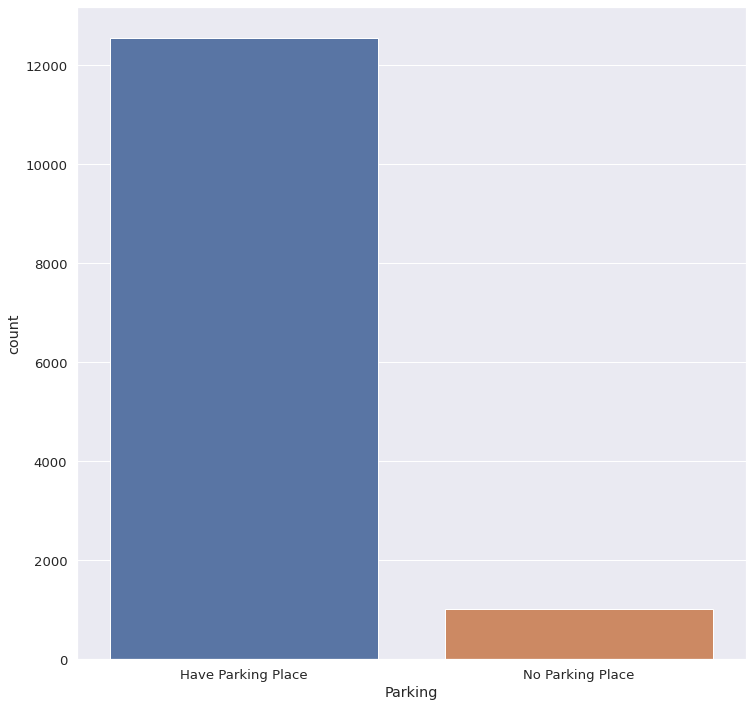

In [ ]:
sns.countplot(x=df_melb_data['Parking'])

In [ ]:
df_sendy_logistics =pd.read_csv('/content/sendy_logistics.csv')

In [ ]:
df_sendy_logistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [ ]:
df_sendy_logistics.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,21201.0,15.653696,8.798916,1.000000,8.000000,15.000000,23.000000,31.000000
Placement - Weekday (Mo = 1),21201.0,3.240083,1.567295,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Destination - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000


In [ ]:
df_sendy_logistics.sample(10)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
13255,Order_No_220,User_Id_649,Bike,3,Business,26,5,3:05:01 PM,26,5,3:07:11 PM,26,5,3:20:54 PM,26,5,3:41:51 PM,26,5,4:01:46 PM,7,NaN,NaN,-1.290179,36.824294,-1.255189,36.782203,Rider_Id_19,1195
12715,Order_No_16,User_Id_346,Bike,3,Business,5,2,12:07:03 PM,5,2,12:13:37 PM,5,2,12:13:49 PM,5,2,12:31:54 PM,5,2,12:32:02 PM,3,23.8,NaN,-1.288780,36.816831,-1.267659,36.810394,Rider_Id_70,8
13339,Order_No_6097,User_Id_2822,Bike,1,Personal,13,4,1:49:46 PM,13,4,2:25:16 PM,13,4,2:36:43 PM,13,4,2:44:09 PM,13,4,3:09:13 PM,6,26.7,NaN,-1.286350,36.827793,-1.288148,36.785028,Rider_Id_713,1504
746,Order_No_23427,User_Id_788,Bike,3,Business,10,1,1:59:18 PM,10,1,2:03:49 PM,10,1,2:15:42 PM,10,1,2:33:47 PM,10,1,2:59:03 PM,8,18.6,NaN,-1.257147,36.795063,-1.225322,36.808550,Rider_Id_755,1516
13287,Order_No_21190,User_Id_393,Bike,3,Business,13,4,9:56:54 AM,13,4,9:57:12 AM,13,4,9:59:28 AM,13,4,10:08:23 AM,13,4,10:50:18 AM,14,18.7,NaN,-1.322800,36.830644,-1.299144,36.752880,Rider_Id_157,2515
1768,Order_No_4187,User_Id_1502,Bike,3,Business,11,2,2:51:40 PM,11,2,2:52:01 PM,11,2,2:59:35 PM,11,2,3:05:00 PM,11,2,3:47:43 PM,19,22.1,NaN,-1.301446,36.766138,-1.223212,36.893255,Rider_Id_65,2563
20472,Order_No_17645,User_Id_868,Bike,3,Business,13,6,1:48:59 PM,13,6,1:49:14 PM,13,6,1:49:56 PM,13,6,2:08:30 PM,13,6,2:18:41 PM,4,27.5,NaN,-1.260093,36.808869,-1.265715,36.823815,Rider_Id_72,611
5795,Order_No_15282,User_Id_552,Bike,3,Business,11,1,11:02:50 AM,11,1,11:11:04 AM,11,1,11:37:21 AM,11,1,12:02:14 PM,11,1,12:54:51 PM,21,26.4,NaN,-1.257147,36.795063,-1.335477,36.930830,Rider_Id_935,3157
8746,Order_No_24773,User_Id_1675,Bike,1,Personal,15,3,9:58:33 AM,15,3,10:00:47 AM,15,3,10:11:31 AM,15,3,10:16:14 AM,15,3,10:55:20 AM,8,16.3,NaN,-1.296797,36.776453,-1.285064,36.817945,Rider_Id_674,2346
9647,Order_No_20556,User_Id_1527,Bike,3,Business,25,6,11:45:56 AM,25,6,11:47:23 AM,25,6,11:51:43 AM,25,6,12:06:03 PM,25,6,12:47:39 PM,4,NaN,NaN,-1.307787,36.844321,-1.300406,36.829741,Rider_Id_448,2496


In [ ]:
# create cloumn for calculating speed 
df_sendy_logistics['Speed (KM/M)'] = (df_sendy_logistics['Distance (KM)']) / (df_sendy_logistics['Time from Pickup to Arrival']/60)

In [ ]:
df_sendy_logistics['Speed (KM/M)']

0         0.322148
1         0.481686
2         0.395604
3         0.402685
4         0.444811
           ...    
21196    20.000000
21197     0.545455
21198     0.406366
21199     0.565217
21200     0.338346
Name: Speed (KM/M), Length: 21201, dtype: float64

In [ ]:
df_sendy_logistics['Speed (KM/M)'].describe()

count    21201.000000
mean         4.155090
std         31.754955
min          0.015337
25%          0.274390
50%          0.384410
75%          0.504808
max       1020.000000
Name: Speed (KM/M), dtype: float64

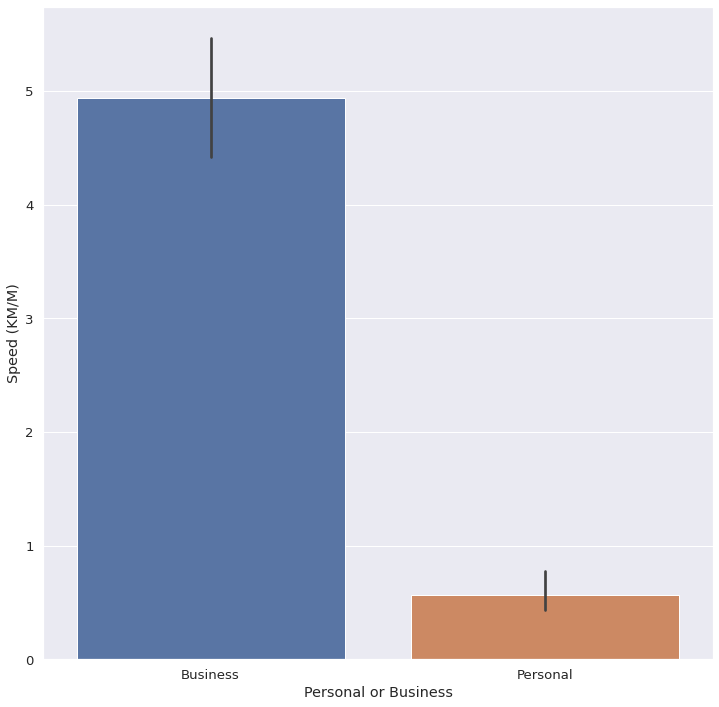

In [ ]:
sns.barplot(x =df_sendy_logistics['Personal or Business'] , y=df_sendy_logistics['Speed (KM/M)'] , estimator=np.mean)

# **2. Date and Time Features:-**

>It's Process of Building an ordinal relationship between the values is very challenging for a machine learning algorithm if you leave the date columns without manipulation  It might be the reason for this, that 
dates can be present in numerous formats, which make it 
hard to understand by algorithms.

>**So we can do the following :**
  1. Extract day, hour, minute, seconds, quarter, month, year, etc.
  2. Extract time-based features like evenings, noon, night time etc.
  3.  Extract seasonal features like winter, summer, autumn.
  4. Calculate time elapsed between two related Date features.noons, night time etc.
.




In [ ]:
df_911 = pd.read_csv('/content/911.csv')

In [ ]:
df_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        423909 non-null  float64
 1   lng        423909 non-null  float64
 2   desc       423909 non-null  object 
 3   zip        371780 non-null  float64
 4   title      423909 non-null  object 
 5   timeStamp  423909 non-null  object 
 6   twp        423750 non-null  object 
 7   addr       423909 non-null  object 
 8   e          423909 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [ ]:
df_911.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,423909.0,40.158618,0.129170,0.000000,40.099784,40.143900,40.229008,51.335390
lng,423909.0,-75.314022,0.656048,-119.698206,-75.391547,-75.304563,-75.210760,87.854975
zip,371780.0,19234.732269,301.388898,3366.000000,19038.000000,19401.000000,19446.000000,77316.000000
e,423909.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_911.sample(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
336630,40.143326,-75.422819,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,NaN,Traffic: VEHICLE ACCIDENT -,2018-04-19 06:23:30,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS,1
261855,40.150861,-75.493956,OSPREY WAY & BLUEBIRD DR; UPPER PROVIDENCE; S...,19460.0,EMS: MEDICAL ALERT ALARM,2017-10-21 15:00:40,UPPER PROVIDENCE,OSPREY WAY & BLUEBIRD DR,1
131935,40.097222,-75.376195,GULPH RD & TURNPIKE OVERPASS; UPPER MERION; 20...,NaN,Traffic: VEHICLE ACCIDENT -,2016-11-16 08:11:46,UPPER MERION,GULPH RD & TURNPIKE OVERPASS,1
2462,40.239436,-75.236238,COUNTRY CLUB DR & DOYLESTOWN PIKE; MONTGOMERY...,NaN,EMS: FALL VICTIM,2015-12-17 00:12:04,MONTGOMERY,COUNTRY CLUB DR & DOYLESTOWN PIKE,1
245052,40.174563,-75.456036,LARCHWOOD CT & PERKIOMEN BLVD; UPPER PROVIDEN...,19426.0,EMS: SYNCOPAL EPISODE,2017-09-07 17:19:33,UPPER PROVIDENCE,LARCHWOOD CT & PERKIOMEN BLVD,1
294141,40.155827,-75.365208,GERMANTOWN PIKE & BRIDLE PATH RD; EAST NORRITO...,19403.0,Fire: FIRE ALARM,2018-01-07 21:47:38,EAST NORRITON,GERMANTOWN PIKE & BRIDLE PATH RD,1
138385,40.103963,-75.147390,KESWICK AVE & ABINGTON AVE; ABINGTON; Station...,19038.0,EMS: FALL VICTIM,2016-12-01 16:11:07,ABINGTON,KESWICK AVE & ABINGTON AVE,1
262049,40.133422,-75.372498,MARSHALL ST & N SCHUYLKILL AVE; WEST NORRITON;...,19403.0,Traffic: VEHICLE ACCIDENT -,2017-10-22 03:03:54,WEST NORRITON,MARSHALL ST & N SCHUYLKILL AVE,1
104196,40.244912,-75.644363,HIGH ST & S FRANKLIN ST; POTTSTOWN; Station 3...,19464.0,EMS: OVERDOSE,2016-09-07 12:53:04,POTTSTOWN,HIGH ST & S FRANKLIN ST,1
49971,40.008680,-75.210760,PRESIDENTIAL BLVD & E CITY AVE; LOWER MERION; ...,19004.0,Fire: WOODS/FIELD FIRE,2016-04-18 12:37:54,LOWER MERION,PRESIDENTIAL BLVD & E CITY AVE,1


In [ ]:
#Converting its type from object to datatime
df_911["timeStamp"] = pd.to_datetime(df_911["timeStamp"])

In [ ]:
df_911['timeStamp'] = pd.to_datetime(df_911['timeStamp'],format='%m/%d/%Y %H:%M', errors="coerce")
# errors="coerce" to put null values(nan) in empty rows in column
# errors="ignore" to ignore empty rows in column
# errors="raise" to raise  as found empty rows in column

In [ ]:
df_911['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
423904   2018-11-16 08:54:08
423905   2018-11-16 08:53:32
423906   2018-11-16 08:54:19
423907   2018-11-16 08:51:48
423908   2018-11-16 08:46:25
Name: timeStamp, Length: 423909, dtype: datetime64[ns]

In [ ]:
df_911['Date']= df_911['timeStamp'].dt.date
df_911['Year'] = df_911['timeStamp'].dt.year
df_911['Month'] = df_911['timeStamp'].dt.month
df_911['Month_Name'] = df_911['timeStamp'].dt.month_name()
df_911['Week'] =df_911['timeStamp'].dt.isocalendar().week
df_911['Day'] = df_911['timeStamp'].dt.day
df_911['Week_Day'] = df_911['timeStamp'].dt.weekday
df_911['Day_Name'] = df_911['timeStamp'].dt.day_name()
df_911['Hour'] = df_911['timeStamp'].dt.hour
df_911['Minute'] = df_911['timeStamp'].dt.minute

In [ ]:
df_911.sample(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute
82441,40.224237,-75.319689,VALLEY FORGE RD & JACKS LN; UPPER GWYNEDD; 201...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-07-13 15:32:36,UPPER GWYNEDD,VALLEY FORGE RD & JACKS LN,1,2016-07-13,2016,7,July,28,13,2,Wednesday,15,32
234735,40.092686,-75.137107,WEST AVE & GREENWOOD AVE; JENKINTOWN; 2017-08-...,19046.0,Fire: GAS-ODOR/LEAK,2017-08-11 12:30:09,JENKINTOWN,WEST AVE & GREENWOOD AVE,1,2017-08-11,2017,8,August,32,11,4,Friday,12,30
159409,40.097222,-75.376195,SCHUYLKILL EXPY & WEADLEY RD OVERPASS; UPPER ...,NaN,EMS: VEHICLE ACCIDENT,2017-01-25 00:40:48,UPPER MERION,SCHUYLKILL EXPY & WEADLEY RD OVERPASS,1,2017-01-25,2017,1,January,4,25,2,Wednesday,0,40
370350,40.254768,-75.660459,ROBINSON ST & SHOEMAKER RD; POTTSTOWN; Statio...,19464.0,EMS: CARDIAC EMERGENCY,2018-07-12 09:54:07,POTTSTOWN,ROBINSON ST & SHOEMAKER RD,1,2018-07-12,2018,7,July,28,12,3,Thursday,9,54
401684,40.206081,-75.224618,BETHLEHEM PIKE & WELSH RD; HORSHAM; 2018-09-27...,19454.0,Traffic: VEHICLE ACCIDENT -,2018-09-27 21:01:58,HORSHAM,BETHLEHEM PIKE & WELSH RD,1,2018-09-27,2018,9,September,39,27,3,Thursday,21,1
68033,40.158093,-75.229173,RAILROAD AVE & OAK ST; WHITPAIN; Station 385;...,19002.0,EMS: UNKNOWN MEDICAL EMERGENCY,2016-06-05 22:05:53,WHITPAIN,RAILROAD AVE & OAK ST,1,2016-06-05,2016,6,June,22,5,6,Sunday,22,5
86650,40.176527,-75.207409,TENNIS AVE & GIFT CIR; LOWER GWYNEDD; 2016-07-...,19002.0,Fire: FIRE ALARM,2016-07-24 07:26:28,LOWER GWYNEDD,TENNIS AVE & GIFT CIR,1,2016-07-24,2016,7,July,29,24,6,Sunday,7,26
24203,40.242028,-75.283258,BROAD ST & W 2ND ST; LANSDALE; 2016-02-09 @ 14...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-02-09 14:22:16,LANSDALE,BROAD ST & W 2ND ST,1,2016-02-09,2016,2,February,6,9,1,Tuesday,14,22
76876,40.254100,-75.338864,DOCK DR & DETWILER RD; TOWAMENCIN; Station 34...,19446.0,EMS: SYNCOPAL EPISODE,2016-06-28 14:35:23,TOWAMENCIN,DOCK DR & DETWILER RD,1,2016-06-28,2016,6,June,26,28,1,Tuesday,14,35
246281,40.098936,-75.125868,YORK RD & HILLSIDE AVE; JENKINTOWN; Station 3...,19046.0,EMS: CARDIAC EMERGENCY,2017-09-11 11:39:19,JENKINTOWN,YORK RD & HILLSIDE AVE,1,2017-09-11,2017,9,September,37,11,0,Monday,11,39


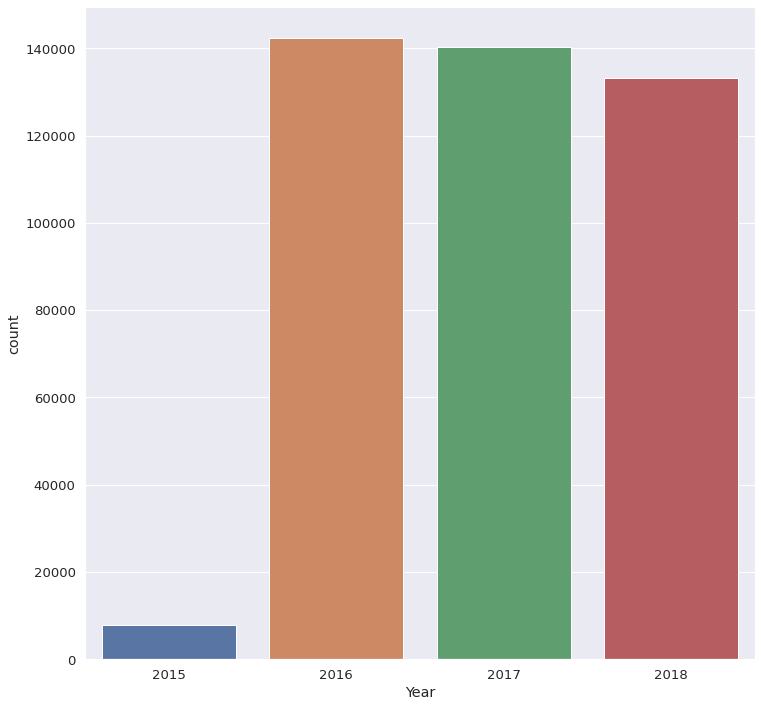

In [ ]:
sns.countplot(x=df_911["Year"])



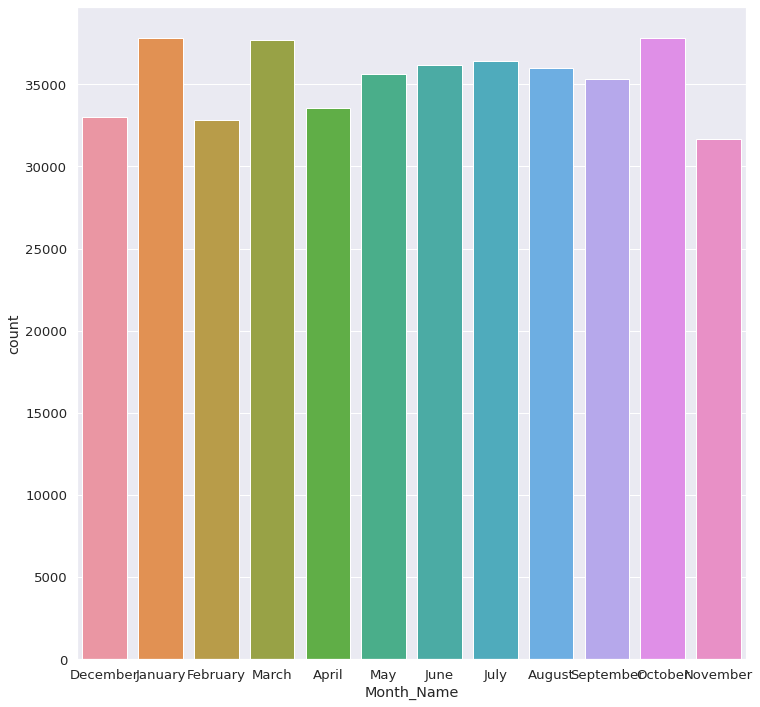

In [ ]:
sns.countplot(x=df_911['Month_Name'])

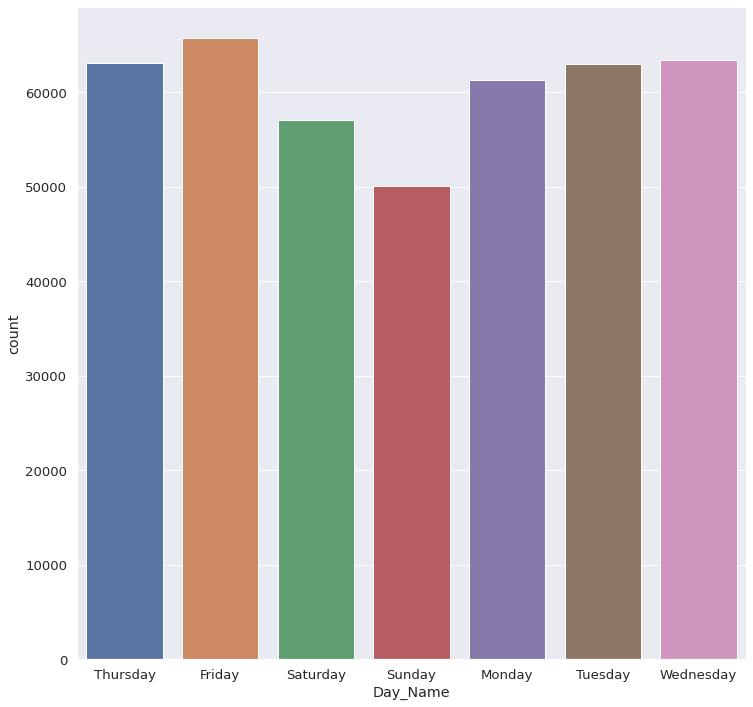

In [ ]:
sns.countplot(x=df_911['Day_Name'])

In [ ]:
#Function for getting period of days
def map_hours(x):
    if x in range(0, 13):
        return 'morning'
    elif x in range(13, 19): 
        return 'afternoon'
    else:
        return 'evening'
#Function for getting sessions in year    
def map_months(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    elif x in [9, 10, 11]:
        return 'Autumn'


In [ ]:
df_911['Period'] = df_911['Hour'].apply(map_hours)

In [ ]:
df_911['Period']

0         afternoon
1         afternoon
2         afternoon
3         afternoon
4         afternoon
            ...    
423904      morning
423905      morning
423906      morning
423907      morning
423908      morning
Name: Period, Length: 423909, dtype: object

In [ ]:
df_911['Period'].describe()

count      423909
unique          3
top       morning
freq       188183
Name: Period, dtype: object

In [ ]:
df_911['Period'].value_counts()

morning      188183
afternoon    158014
evening       77712
Name: Period, dtype: int64

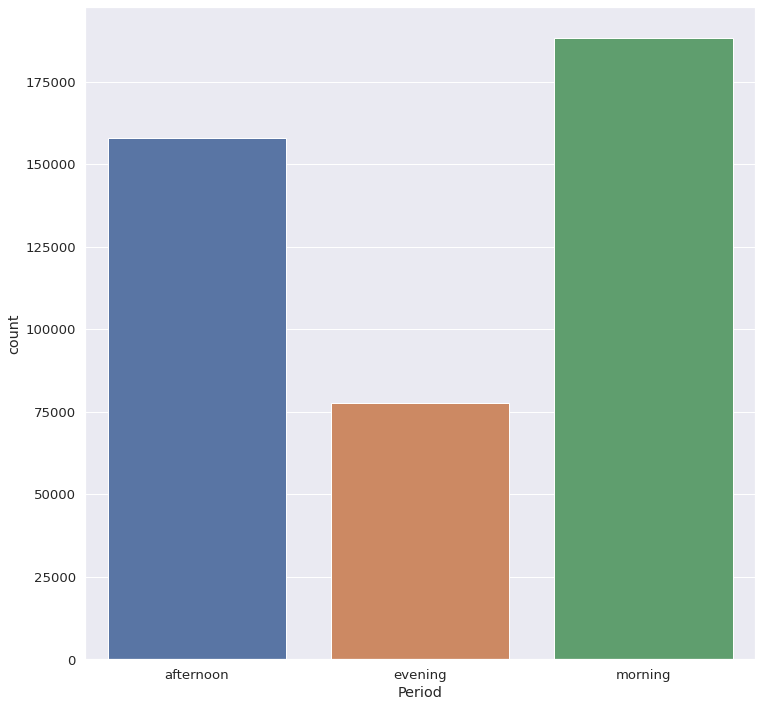

In [ ]:
sns.countplot(x=df_911['Period'])

In [ ]:
df_911['Season'] = df_911['Month'].apply(map_months)

In [ ]:
df_911['Season']

0         Winter
1         Winter
2         Winter
3         Winter
4         Winter
           ...  
423904    Autumn
423905    Autumn
423906    Autumn
423907    Autumn
423908    Autumn
Name: Season, Length: 423909, dtype: object

In [ ]:
df_911['Season'].describe()

count     423909
unique         4
top       Summer
freq      108548
Name: Season, dtype: object

In [ ]:
df_911['Season'].value_counts()

Summer    108548
Spring    106893
Autumn    104797
Winter    103671
Name: Season, dtype: int64

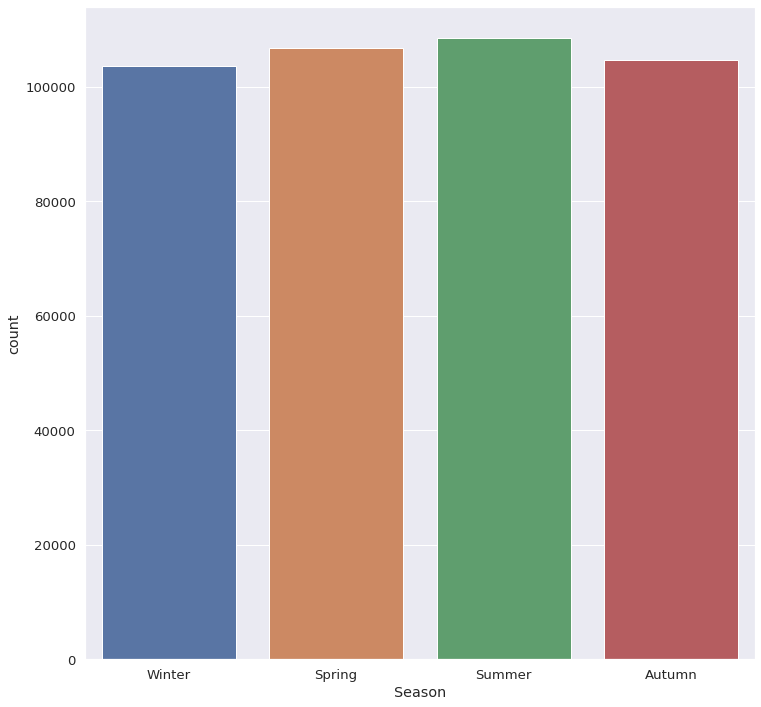

In [ ]:
sns.countplot(x=df_911['Season'])

In [ ]:
df_911['Elapsed_Years from WW2']  = (df_911['timeStamp']-datetime(1945, 9, 2  )) / np.timedelta64(1, 'Y') # could be Y, M, D, W, h, m, s

In [ ]:
df_911['Elapsed_Years from WW2']

0         70.273081
1         70.273116
2         70.272793
3         70.273037
4         70.273055
            ...    
423904    73.207173
423905    73.207172
423906    73.207173
423907    73.207169
423908    73.207158
Name: Elapsed_Years from WW2, Length: 423909, dtype: float64

In [ ]:
df_911.sample(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season,Elapsed_Years from WW2
318356,40.085816,-75.093649,HUNTINGDON PIKE & SAN DIEGO AVE; ABINGTON; St...,19046.0,EMS: SEIZURES,2018-03-03 21:39:46,ABINGTON,HUNTINGDON PIKE & SAN DIEGO AVE,1,2018-03-03,2018,3,March,9,3,5,Saturday,21,39,evening,Spring,72.502249
105619,40.121497,-75.339905,FREEDLEY ST & JERVIS ALY; NORRISTOWN; Station...,NaN,EMS: GENERAL WEAKNESS,2016-09-10 21:02:41,NORRISTOWN,FREEDLEY ST & JERVIS ALY,1,2016-09-10,2016,9,September,36,10,5,Saturday,21,2,evening,Autumn,71.026446
311651,40.097222,-75.376195,PENNSYLVANIA TPKE & COLBERT ST UNDERPASS; UPPE...,NaN,Traffic: DISABLED VEHICLE -,2018-02-20 13:30:55,UPPER MERION,PENNSYLVANIA TPKE & COLBERT ST UNDERPASS,1,2018-02-20,2018,2,February,8,20,1,Tuesday,13,30,afternoon,Winter,72.471202
251770,40.364863,-75.592538,MILLER RD & HOFFMANSVILLE RD; DOUGLASS; Stati...,NaN,EMS: CARDIAC ARREST,2017-09-26 02:19:48,DOUGLASS,MILLER RD & HOFFMANSVILLE RD,1,2017-09-26,2017,9,September,39,26,1,Tuesday,2,19,morning,Autumn,72.067454
266113,40.134074,-75.150432,FITZWATERTOWN RD & ALPIN DR; UPPER DUBLIN; 201...,19025.0,Traffic: VEHICLE ACCIDENT -,2017-10-31 23:14:07,UPPER DUBLIN,FITZWATERTOWN RD & ALPIN DR,1,2017-10-31,2017,10,October,44,31,1,Tuesday,23,14,evening,Autumn,72.165666
163028,40.129651,-75.435124,EGYPT RD & SURREY LN; LOWER PROVIDENCE; 2017-0...,19403.0,Traffic: VEHICLE ACCIDENT -,2017-02-04 02:33:59,LOWER PROVIDENCE,EGYPT RD & SURREY LN,1,2017-02-04,2017,2,February,5,4,5,Saturday,2,33,morning,Winter,71.426811
158529,40.069832,-75.316295,BLUEROUTE & RAMP I76 TO I476 NB; WEST CONSHOH...,NaN,Traffic: ROAD OBSTRUCTION -,2017-01-23 08:48:55,WEST CONSHOHOCKEN,BLUEROUTE & RAMP I76 TO I476 NB,1,2017-01-23,2017,1,January,4,23,0,Monday,8,48,morning,Winter,71.394669
175652,40.254768,-75.660459,ROBINSON ST & SHOEMAKER RD; POTTSTOWN; Statio...,19464.0,EMS: DIZZINESS,2017-03-10 10:55:56,POTTSTOWN,ROBINSON ST & SHOEMAKER RD,1,2017-03-10,2017,3,March,10,10,4,Friday,10,55,morning,Spring,71.520854
29046,40.330998,-75.330425,CHURCH AVE & AUTUMN LEA CIR; TELFORD; Station...,18969.0,EMS: SUBJECT IN PAIN,2016-02-21 15:12:06,TELFORD,CHURCH AVE & AUTUMN LEA CIR,1,2016-02-21,2016,2,February,7,21,6,Sunday,15,12,afternoon,Winter,70.472723
21699,40.244486,-75.600192,HIGH ST & SUNNYSIDE AVE; LOWER POTTSGROVE; St...,19464.0,EMS: RESPIRATORY EMERGENCY,2016-02-02 15:18:42,LOWER POTTSGROVE,HIGH ST & SUNNYSIDE AVE,1,2016-02-02,2016,2,February,5,2,1,Tuesday,15,18,afternoon,Winter,70.420715


# **3. String Operations:-**
>There is a lot of data hidden within strings, you can use a lot 
of string operations techniques to extract those data

>**For Example :-**
  1.  Extracting email provider from dataset has account column. 
  2. Extracting credit card type from dataset has credit card number column.  


In [ ]:
df_Ecommerce= pd.read_csv('/content/Ecommerce Purchases.csv')

In [ ]:
df_Ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
df_Ecommerce.describe()

,Credit Card,CC Security Code,Purchase Price
count,1.000000e+04,10000.000000,10000.000000
mean,2.341374e+15,907.217800,50.347302
std,2.256103e+15,1589.693035,29.015836
min,6.040186e+10,0.000000,0.000000
25%,3.056322e+13,280.000000,25.150000
50%,8.699942e+14,548.000000,50.505000
75%,4.492298e+15,816.000000,75.770000
max,6.012000e+15,9993.000000,99.990000


In [ ]:
df_Ecommerce.sample(10)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
2447,"PSC 1907, Box 2461\nAPO AA 59878-8370",31 ec,AM,Mozilla/5.0 (Windows NT 4.0; sl-SI; rv:1.9.1.2...,"Jones, Tucker and Davidson",561253275714,12/18,618,Voyager,pcastillo@petersen-galvan.com,Dramatherapist,151.16.89.149,zh,60.04
6307,"08544 Wilson Prairie\nPort Kimstad, ND 20870",73 Dd,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3;...,Turner-Burns,502088215921,10/19,296,JCB 15 digit,whernandez@hotmail.com,Multimedia programmer,11.152.155.63,it,66.48
5501,"900 Douglas Cliffs\nJosephtown, AS 46749",59 CO,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Wilson-Vasquez,4949553727134912,01/21,755,American Express,melissaboyle@price-price.com,Dealer,143.171.121.18,de,2.84
3551,"4476 Andrea Mountain\nHudsonland, KY 75314",64 qh,PM,Mozilla/5.0 (X11; Linux i686) AppleWebKit/5352...,"Welch, Johnson and Jones",869907407459904,02/25,143,Mastercard,lisa59@hotmail.com,Arboriculturist,98.22.235.214,es,51.35
2121,USS Farmer\nFPO AP 12555,63 zy,AM,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_3 like M...,Boyd-Moran,4805196250359,02/24,693,Mastercard,carl26@reyes.info,Curator,186.117.51.207,zh,13.35
1994,"4979 Kimberly Road Apt. 381\nNorth Jerry, GA 4...",44 kO,PM,Mozilla/5.0 (X11; Linux i686) AppleWebKit/5352...,Roberts Group,346240059721295,12/24,832,Diners Club / Carte Blanche,chelsea48@hotmail.com,Ambulance person,78.237.115.79,fr,72.86
6797,"6678 Bailey Bridge\nPort Mirandabury, NJ 68551...",71 up,PM,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_1...,"Mason, Daugherty and Gregory",5527055964906546,08/21,497,Diners Club / Carte Blanche,samuel15@liu-bryan.com,"Scientist, research (maths)",108.159.35.115,fr,27.76
7341,"438 James Springs Apt. 814\nMaryton, MN 05644",02 Jp,AM,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,"Whitney, Stephenson and Carter",372582995625503,04/21,576,American Express,usanchez@hotmail.com,Special educational needs teacher,83.233.237.131,it,46.88
9116,"51662 Charles Shores\nSharonville, PA 52582-9764",43 eC,PM,Mozilla/5.0 (compatible; MSIE 8.0; Windows 95;...,Green-Lopez,3088035209370829,05/17,8,VISA 13 digit,brianadavis@hotmail.com,"Therapist, sports",131.9.147.20,pt,66.78
9054,"437 Morris Stream\nEast Patricia, CT 34244-8543",87 Pg,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Villegas, Ochoa and Strong",3088313354392272,07/25,880,Mastercard,isherman@lee-schaefer.org,"Engineer, biomedical",52.83.76.54,ru,33.82


In [ ]:
#function for getting email provider
def email_provider(email):
    return email.split('@')[1]

In [ ]:
df_Ecommerce['Email Provider'] = df_Ecommerce['Email'].apply(email_provider)

In [ ]:
df_Ecommerce['Email Provider']

0                  yahoo.com
1                   reed.com
2       morales-harrison.com
3        olson-robinson.info
4                  gmail.com
                ...         
9995         wade-garner.com
9996             hotmail.com
9997               gmail.com
9998                reid.net
9999              vaughn.com
Name: Email Provider, Length: 10000, dtype: object

In [ ]:
df_Ecommerce['Email Provider'].describe()  

count           10000
unique           3416
top       hotmail.com
freq             1638
Name: Email Provider, dtype: object

In [ ]:
df_Ecommerce['Email Provider'].value_counts()  

hotmail.com              1638
yahoo.com                1616
gmail.com                1605
smith.com                  42
williams.com               37
                         ... 
parks-alvarado.net          1
morgan.org                  1
levine-mcpherson.info       1
liu-bryan.com               1
higgins-miller.net          1
Name: Email Provider, Length: 3416, dtype: int64

In [ ]:
top_mails_provider= df_Ecommerce['Email Provider'].value_counts().head(5)

In [ ]:
top_mails_provider.index

Index(['hotmail.com', 'yahoo.com', 'gmail.com', 'smith.com', 'williams.com'], dtype='object')

In [ ]:
df_Ecommerce[df_Ecommerce['Email Provider'].isin(top_mails_provider.index)]

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,Email Provider
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,yahoo.com
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,gmail.com
5,"7502 Powell Mission Apt. 768\nTravisland, VA 3...",21 XT,PM,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_5...,Silva-Anderson,30246185196287,07/25,7169,Discover,ynguyen@gmail.com,Fish farm manager,55.96.152.147,ru,25.15,gmail.com
6,"93971 Conway Causeway\nAndersonburgh, AZ 75107",96 Xt,AM,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,Gibson and Sons,6011398782655569,07/24,714,VISA 16 digit,olivia04@yahoo.com,Dancer,127.252.144.18,de,88.56,yahoo.com
10,"650 Elizabeth Park\nLake Maria, LA 13526-2530",65 Yn,PM,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_1 like M...,"Strickland, Michael and Gonzales",180036417827355,02/17,754,Voyager,ustewart@hotmail.com,"Development worker, community",26.59.93.1,el,96.89,hotmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,"18044 Mcintosh Row Apt. 122\nLake Jennifer, NC...",77 uq,PM,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_6_0...,Chen LLC,210040992311995,09/18,79,JCB 16 digit,heather24@gmail.com,Restaurant manager,93.254.124.2,it,56.25,gmail.com
9989,"5674 Cruz Trace\nNew Shelby, KY 51047-5469",12 Kf,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Vargas, Nichols and Martinez",5278049688438382,12/23,996,VISA 16 digit,walterswilliam@hotmail.com,Community development worker,39.162.164.169,pt,17.18,hotmail.com
9994,"6276 Rojas Hollow\nLake Louis, WY 56410-7837",93 Ex,PM,Opera/9.68.(X11; Linux x86_64; sl-SI) Presto/2...,Ritter-Smith,3112186784121077,01/25,1823,Maestro,iroberts@gmail.com,"Education officer, museum",242.44.112.18,zh,31.85,gmail.com
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",41 JY,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB 16 digit,mary85@hotmail.com,Energy engineer,121.133.168.51,pt,25.63,hotmail.com


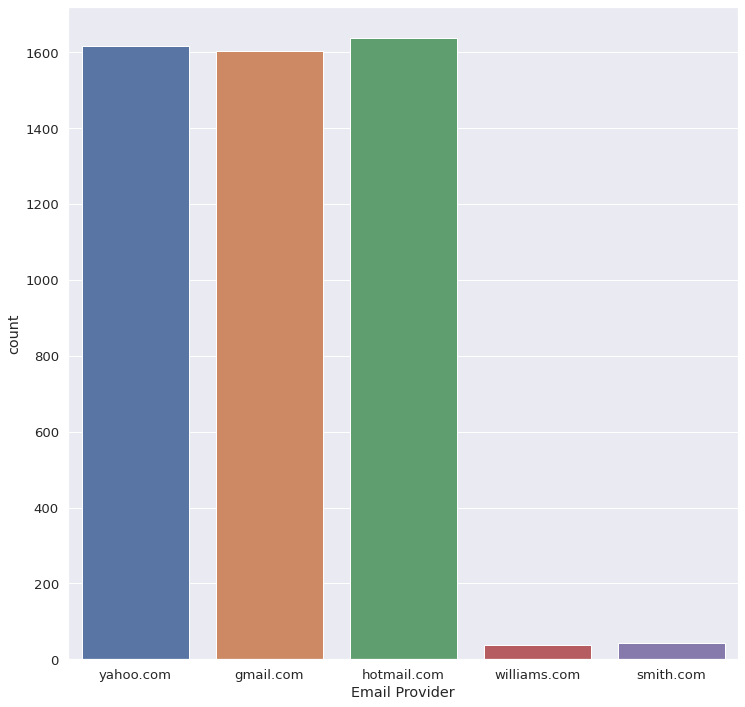

In [ ]:
sns.countplot(x='Email Provider' , data= df_Ecommerce[df_Ecommerce['Email Provider'].isin(top_mails_provider.index)])

In [ ]:
#function for extracting credit card type
def credit_card_type(credit):
    credit = str(credit)
    if credit.startswith('3'):
        return 'Travel/Entertainment cards'
    elif credit.startswith('4'):
        return 'Visa'
    elif credit.startswith('5'):
        return 'Master Card'
    elif credit.startswith('6'):
        return 'Discover Card'   

In [ ]:
df_Ecommerce['Credit Card Type'] = df_Ecommerce['Credit Card'].apply(credit_card_type)

In [ ]:
df_Ecommerce['Credit Card Type']

0                    Discover Card
1       Travel/Entertainment cards
2                    Discover Card
3                    Discover Card
4                    Discover Card
                   ...            
9995    Travel/Entertainment cards
9996                          None
9997                 Discover Card
9998                          None
9999                          Visa
Name: Credit Card Type, Length: 10000, dtype: object

In [ ]:
df_Ecommerce['Credit Card Type'].describe()

count                           8337
unique                             4
top       Travel/Entertainment cards
freq                            3292
Name: Credit Card Type, dtype: object

In [ ]:
df_Ecommerce['Credit Card Type'].value_counts()

Travel/Entertainment cards    3292
Visa                          2492
Discover Card                 1351
Master Card                   1202
Name: Credit Card Type, dtype: int64

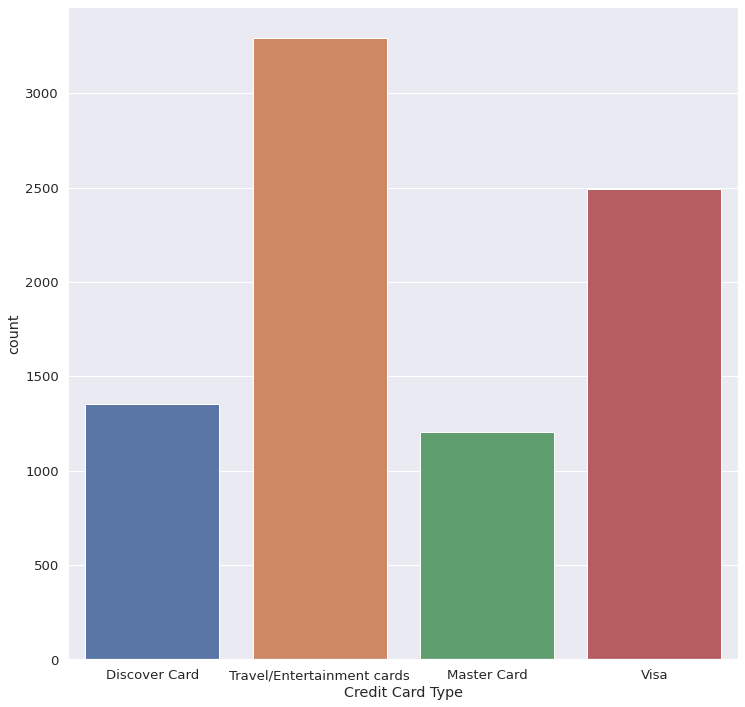

In [ ]:
sns.countplot(x=df_Ecommerce['Credit Card Type'])

In [ ]:
df_titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category,With Passenger
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.00,0,1,24160,211.3375,B5,S,Adolescents,1
123,124,1,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.0000,E101,S,Adults,0
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.00,0,0,SC/Paris 2163,12.8750,D,C,Adults,0
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,Childreen,5
278,279,0,3,"Rice, Master. Eric",male,7.00,4,1,382652,29.1250,NaN,Q,Childreen,5
325,326,1,1,"Young, Miss. Marie Grice",female,36.00,0,0,PC 17760,135.6333,C32,C,Adults,0
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,Childreen,2
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.00,0,5,3101295,39.6875,NaN,S,Adults,5
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S,None,0
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q,None,0


In [ ]:
#function for extracting surname (dr,miss,mr) from name
def surname(name):
  name_list = name.split(', ')
  name_finder = name_list[1].find('.')
  return name_list[1][:name_finder]

In [ ]:
df_titanic['surname'] = df_titanic['Name'].apply(surname)

In [ ]:
df_titanic['surname']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: surname, Length: 891, dtype: object

In [ ]:
df_titanic['surname'].describe()

count     891
unique     17
top        Mr
freq      517
Name: surname, dtype: object

In [ ]:
df_titanic['surname'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Lady              1
the Countess      1
Sir               1
Mme               1
Capt              1
Ms                1
Jonkheer          1
Name: surname, dtype: int64

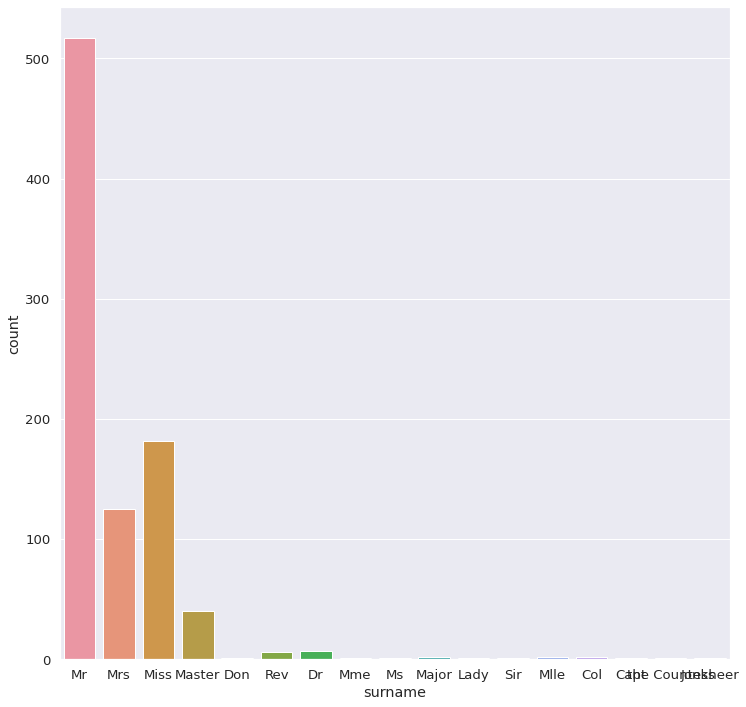

In [ ]:
sns.countplot(x=df_titanic['surname'])

In [ ]:
df_911.sample(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season,Elapsed_Years from WW2
312554,40.182491,-75.090210,E COUNTY LINE RD & N WARMINSTER RD; UPPER MORE...,18974.0,Traffic: VEHICLE ACCIDENT -,2018-02-22 17:15:20,UPPER MORELAND,E COUNTY LINE RD & N WARMINSTER RD,1,2018-02-22,2018,2,February,8,22,3,Thursday,17,15,afternoon,Winter,72.477105
4434,40.149342,-75.127586,SHELDON RD & MADISON RD; UPPER MORELAND; 2015-...,19090.0,Traffic: VEHICLE ACCIDENT -,2015-12-22 15:26:51,UPPER MORELAND,SHELDON RD & MADISON RD,1,2015-12-22,2015,12,December,52,22,1,Tuesday,15,26,afternoon,Winter,70.305738
55062,40.019718,-75.314749,LANCASTER AVE & TOWN PL; LOWER MERION; 2016-05...,19010.0,Traffic: VEHICLE ACCIDENT -,2016-05-02 12:40:59,LOWER MERION,LANCASTER AVE & TOWN PL,1,2016-05-02,2016,5,May,18,2,0,Monday,12,40,morning,Spring,70.666827
63406,40.145223,-75.318684,W GERMANTOWN PIKE & SWEDE RD; EAST NORRITON; 2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-05-25 08:13:19,EAST NORRITON,W GERMANTOWN PIKE & SWEDE RD,1,2016-05-25,2016,5,May,21,25,2,Wednesday,8,13,morning,Spring,70.729290
324861,40.249139,-75.646177,BEECH ST & LOCUST ALY; POTTSTOWN; Station 329...,19464.0,EMS: SEIZURES,2018-03-18 23:13:32,POTTSTOWN,BEECH ST & LOCUST ALY,1,2018-03-18,2018,3,March,11,18,6,Sunday,23,13,evening,Spring,72.543496
48435,40.087195,-75.141239,KENT RD & HEACOCK LN; CHELTENHAM; 2016-04-14 @...,19095.0,Traffic: ROAD OBSTRUCTION -,2016-04-14 08:11:07,CHELTENHAM,KENT RD & HEACOCK LN,1,2016-04-14,2016,4,April,15,14,3,Thursday,8,11,morning,Spring,70.617031
146276,40.230981,-75.341775,RAMPART LN & BETH LN; TOWAMENCIN; Station 345...,19446.0,EMS: CARDIAC EMERGENCY,2016-12-21 10:46:53,TOWAMENCIN,RAMPART LN & BETH LN,1,2016-12-21,2016,12,December,51,21,2,Wednesday,10,46,morning,Winter,71.304542
388947,40.227171,-75.507443,HEFFNER RD & HARNETT LN; LIMERICK; Station 32...,19468.0,EMS: SUBJECT IN PAIN,2018-08-27 19:01:30,LIMERICK,HEFFNER RD & HARNETT LN,1,2018-08-27,2018,8,August,35,27,0,Monday,19,1,evening,Summer,72.986557
111553,40.070974,-75.318671,MOIR AVE & STEAD ST; WEST CONSHOHOCKEN; Stati...,19428.0,EMS: SYNCOPAL EPISODE,2016-09-26 10:51:11,WEST CONSHOHOCKEN,MOIR AVE & STEAD ST,1,2016-09-26,2016,9,September,39,26,0,Monday,10,51,morning,Autumn,71.069090
355688,40.029665,-75.324281,AIRDALE RD & W MONTGOMERY AVE; LOWER MERION; 2...,19010.0,Traffic: DISABLED VEHICLE -,2018-06-06 12:09:06,LOWER MERION,AIRDALE RD & W MONTGOMERY AVE,1,2018-06-06,2018,6,June,23,6,2,Wednesday,12,9,morning,Summer,72.761265


In [ ]:
def extract_reason(title):
  title_list = title.split(':')
  return title_list[0]


In [ ]:
df_911['Reason'] = df_911['title'].apply(extract_reason)  

In [ ]:
df_911['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
423904    Traffic
423905    Traffic
423906    Traffic
423907    Traffic
423908    Traffic
Name: Reason, Length: 423909, dtype: object

In [ ]:
df_911['Reason'].describe()

count     423909
unique         3
top          EMS
freq      208676
Name: Reason, dtype: object

In [ ]:
df_911['Reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

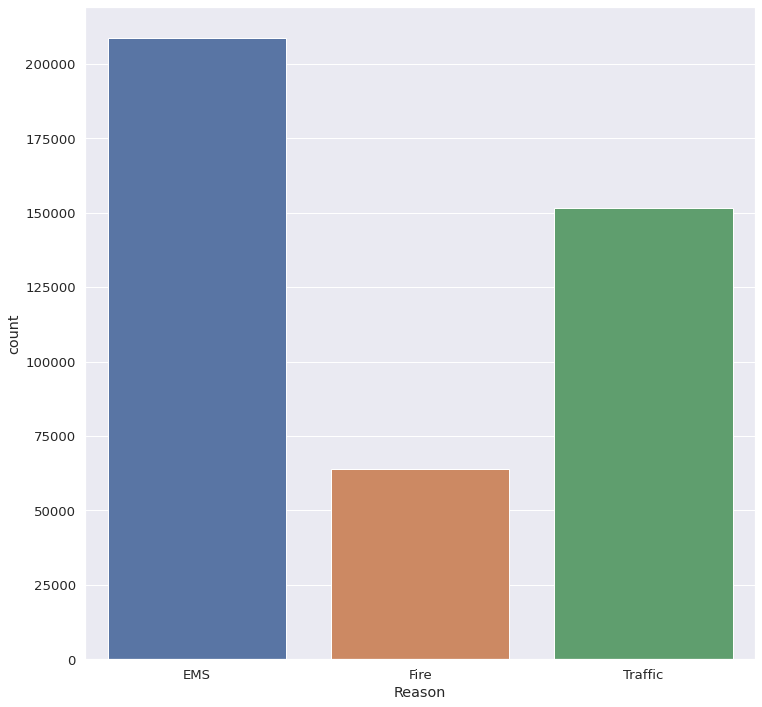

In [ ]:
sns.countplot(x=df_911['Reason'])